In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [7]:
df = pd.read_csv("data_sets/test_scores.csv")
df.head(100)

,name,math,cs
0,david,92,98
1,laura,56,68
2,sanjay,88,81
3,wei,70,80
4,jeff,80,83
5,aamir,49,52
6,venkat,65,66
7,virat,35,30
8,arthur,66,68
9,paul,67,73


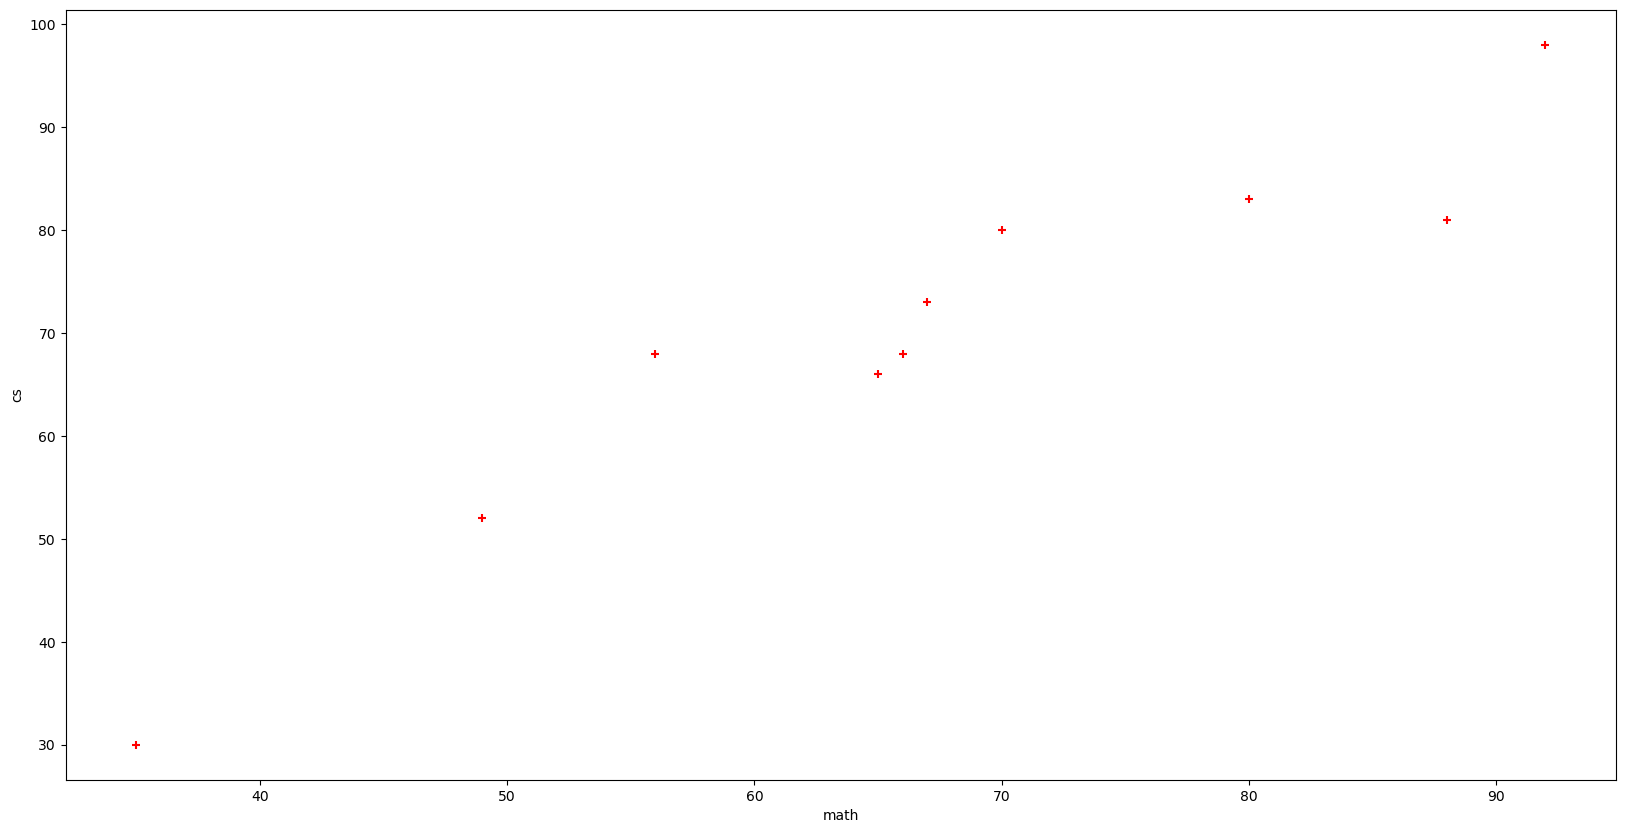

In [16]:
# Visualize the data
plt.xlabel("math")
plt.ylabel("cs")
plt.scatter(df["math"], df["cs"], color="red", marker="+")
plt.show()

## Gradient Descent Algorithm

We want to find the best fit line: **y = mx + b**

Where:
- m = slope (coefficient)
- b = y-intercept

**Cost Function (Mean Squared Error):**
$$cost = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

**Gradient Descent Update Rules:**
$$m = m - learning\_rate \times \frac{\partial cost}{\partial m}$$
$$b = b - learning\_rate \times \frac{\partial cost}{\partial b}$$

**Partial Derivatives:**
$$\frac{\partial cost}{\partial m} = -\frac{2}{n} \sum_{i=1}^{n} x_i(y_i - (mx_i + b))$$
$$\frac{\partial cost}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - (mx_i + b))$$

In [9]:
def gradient_descent(x, y):
    # Initialize parameters
    m_curr = 0  # slope
    b_curr = 0  # intercept
    iterations = 10000
    n = len(x)
    learning_rate = 0.0002  # how big of a step we take
    
    cost_history = []  # to track cost over iterations
    
    for i in range(iterations):
        # Predictions using current m and b
        y_predicted = m_curr * x + b_curr
        
        # Calculate cost (Mean Squared Error)
        cost = (1/n) * sum((y - y_predicted)**2)
        cost_history.append(cost)
        
        # Calculate gradients (partial derivatives)
        md = -(2/n) * sum(x * (y - y_predicted))  # derivative with respect to m
        bd = -(2/n) * sum(y - y_predicted)        # derivative with respect to b
        
        # Update parameters
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        
        # Print progress every 1000 iterations
        if i % 1000 == 0:
            print(f"Iteration {i}: m={m_curr:.4f}, b={b_curr:.4f}, cost={cost:.4f}")
    
    print(f"\nFinal: m={m_curr:.4f}, b={b_curr:.4f}, cost={cost:.4f}")
    return m_curr, b_curr, cost_history

In [10]:
# Run gradient descent
x = df["math"].values
y = df["cs"].values

m, b, cost_history = gradient_descent(x, y)

Iteration 0: m=1.9784, b=0.0280, cost=5199.1000
Iteration 1000: m=1.0439, b=0.0579, cost=31.8025
Iteration 2000: m=1.0433, b=0.1001, cost=31.7937
Iteration 3000: m=1.0428, b=0.1413, cost=31.7852
Iteration 4000: m=1.0422, b=0.1815, cost=31.7771
Iteration 5000: m=1.0416, b=0.2209, cost=31.7693
Iteration 6000: m=1.0411, b=0.2593, cost=31.7619
Iteration 7000: m=1.0406, b=0.2969, cost=31.7549
Iteration 8000: m=1.0401, b=0.3336, cost=31.7481
Iteration 9000: m=1.0395, b=0.3695, cost=31.7417

Final: m=1.0391, b=0.4046, cost=31.7355


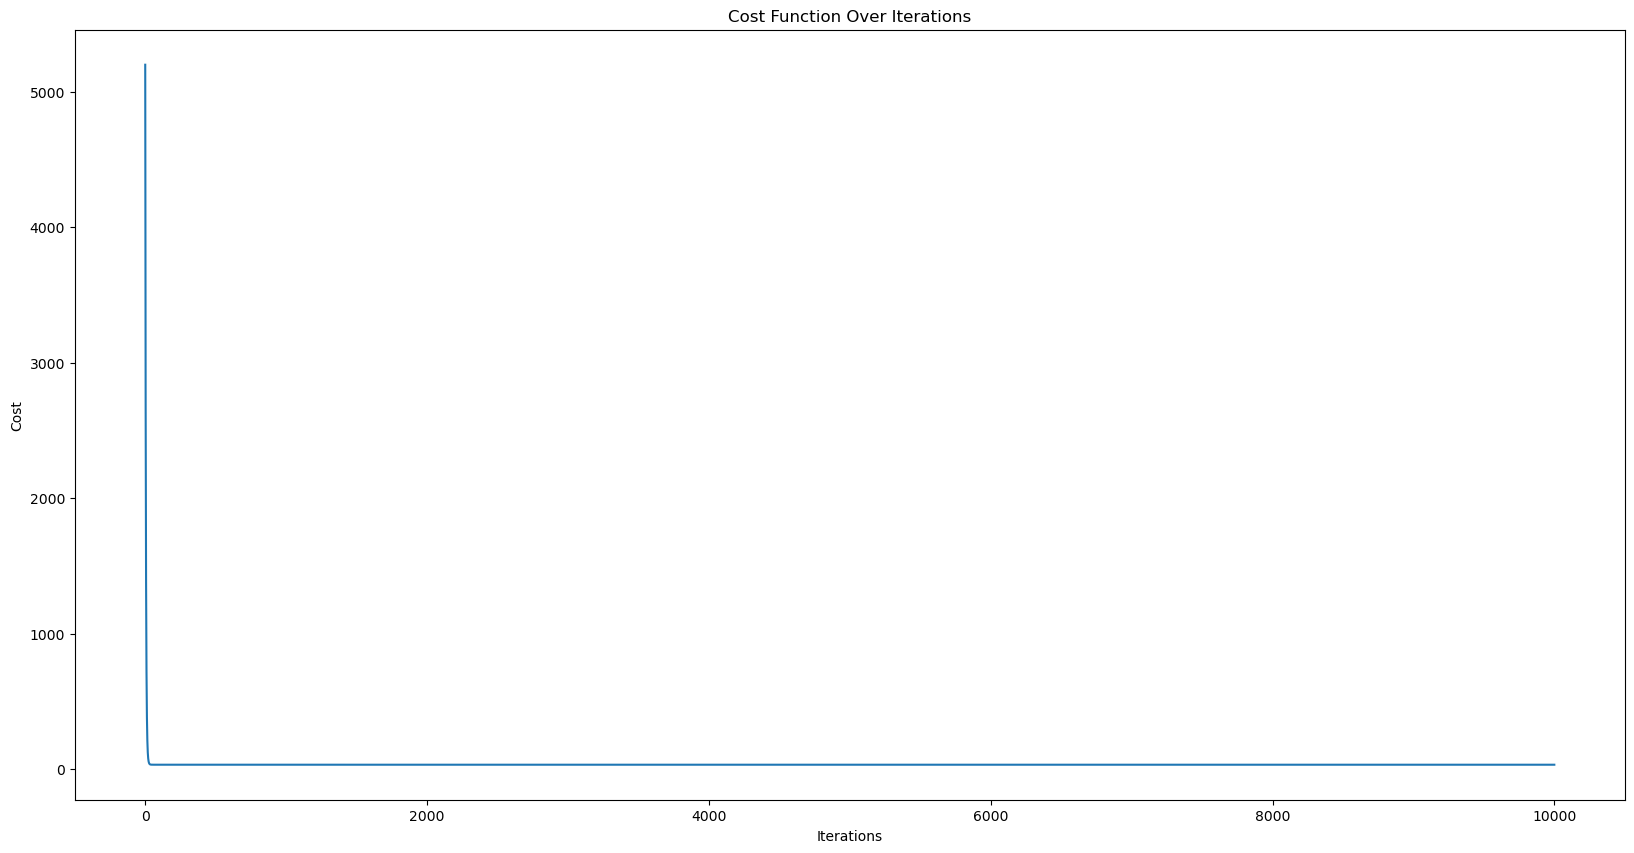

In [11]:
# Plot the cost over iterations to see convergence
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.plot(cost_history)
plt.title("Cost Function Over Iterations")
plt.show()

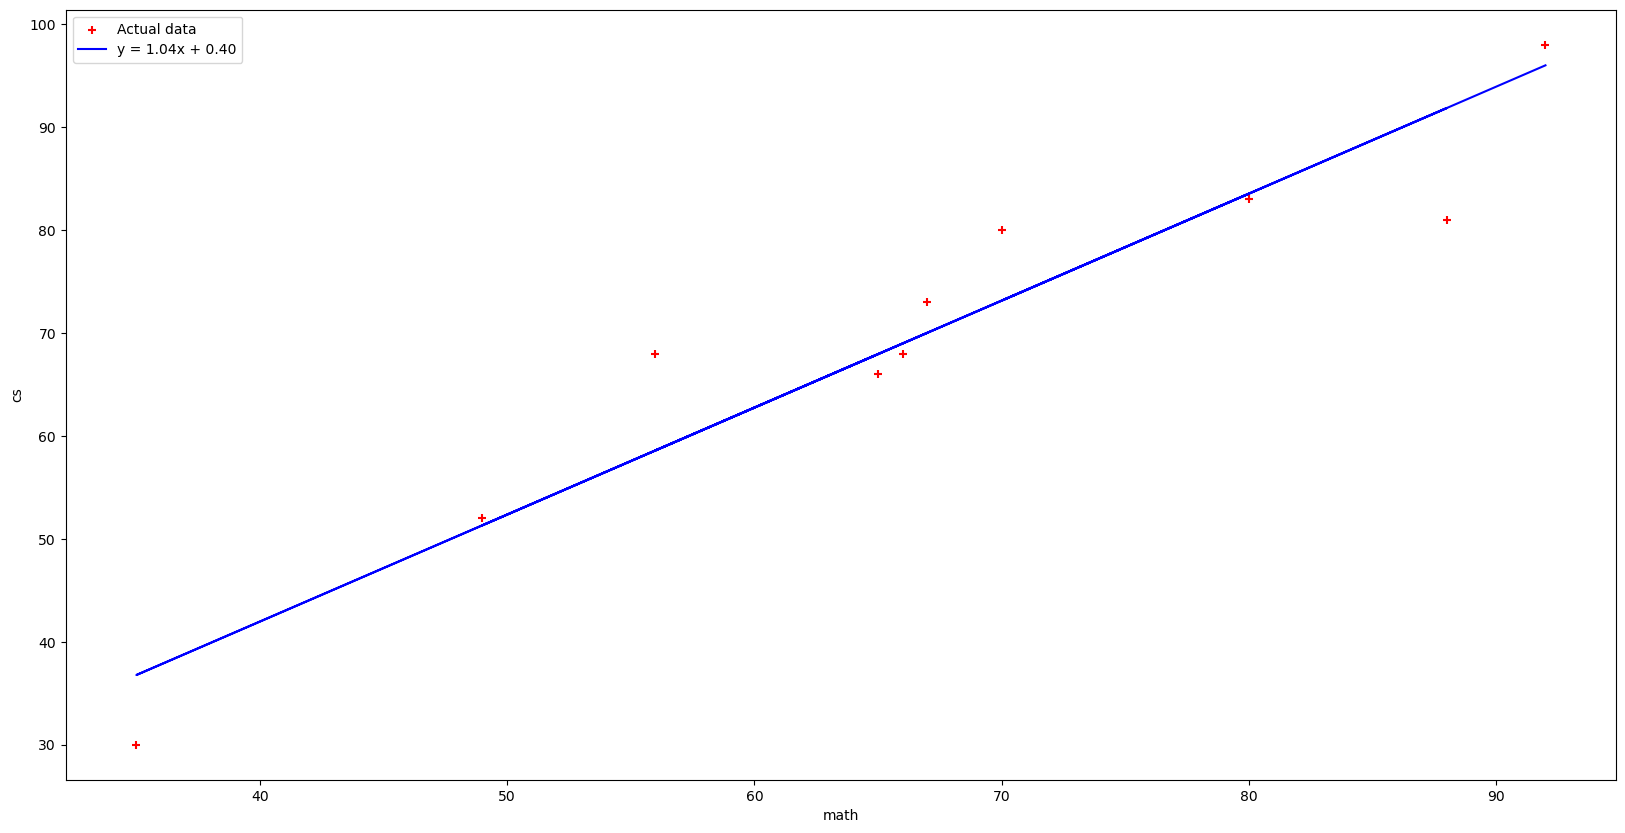

In [12]:
# Plot the best fit line
plt.xlabel("math")
plt.ylabel("cs")
plt.scatter(df["math"], df["cs"], color="red", marker="+", label="Actual data")

# Plot the line: y = mx + b
plt.plot(x, m * x + b, color="blue", label=f"y = {m:.2f}x + {b:.2f}")
plt.legend()
plt.show()

In [20]:
# Make a prediction
# Example: if math score is 85, what will CS score be?
math_score = 85
cs_predicted = m * math_score + b
print(f"If math score is {math_score}, predicted CS score is {cs_predicted:.2f}")

If math score is 85, predicted CS score is 88.72


In [21]:
from sklearn.linear_model import LinearRegression
def predict_using_sklean():
    r = LinearRegression()
    r.fit(df[['math']],df.cs)
    return r.coef_, r.intercept_

m_sklearn, b_sklearn = predict_using_sklean()
print(f"Using sklearn: m={m_sklearn[0]:.4f}, b={b_sklearn:.4f}")

Using sklearn: m=1.0177, b=1.9152
